In [1]:
pip install pandas openpyxl matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Carregar o arquivo .xlsx
# Substitua 'arquivo.xlsx' pelo nome do seu arquivo
df = pd.read_excelC (r'C:\Users\Atapel\Contacts\Desktop\UniCesumarfev2022\DSAPythonCurso\Arq01\DSACienDados4\ArqTest\ListAssocATAPELa.xlsx')

In [61]:
# Verificar as 5 pessoas com maior idade
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')
top_5_mais_velhos = df.nlargest(5, 'Idade')

In [69]:
print("As 5 pessoas mais velhas:\n", top_5_mais_velhos[['Nome', 'Idade']])

As 5 pessoas mais velhas:
                            Nome  Idade
20         WANIRA FLOR LARRUSCA     99
34         WILMA GOMESA BRAZUKA     98
21  WENSCESLADO DA ROSA MOREINA     95
28    WILMAE REMEDIO BAPTISTACA     95
19      WANDERLY VICENT RODRIGO     88


In [49]:
print(df['Idade'].dtype)

int64


In [43]:
print(df.columns)

Index(['Nome', 'Telefone', 'Endereço', 'Sócio desde', 'Idade', 'Dependentes',
       'Mensalidade'],
      dtype='object')


In [51]:
# Calcular a média de idade
media_idade = df['Idade'].mean()

In [73]:
print(f"\nMédia de idade: {media_idade:.2f} anos")


Média de idade: 71.49 anos


In [63]:
# Calcular o valor médio das mensalidades
media_mensalidades = df['Mensalidade'].mean()

In [75]:
print(f"Valor médio das mensalidades: R$ {media_mensalidades:.2f}")

Valor médio das mensalidades: R$ 38.60


In [65]:
# Identificar a pessoa que pagou o maior valor e o valor pago
maior_valor_pago = df.loc[df['Mensalidade'].idxmax()]

In [78]:
print(f"\nPessoa que pagou o maior valor: {maior_valor_pago['Nome']}")


Pessoa que pagou o maior valor: WILMARO DA ROSE DORNELAS


In [80]:
print(f"Maior valor pago: R$ {maior_valor_pago['Mensalidade']}")

Maior valor pago: R$ 66


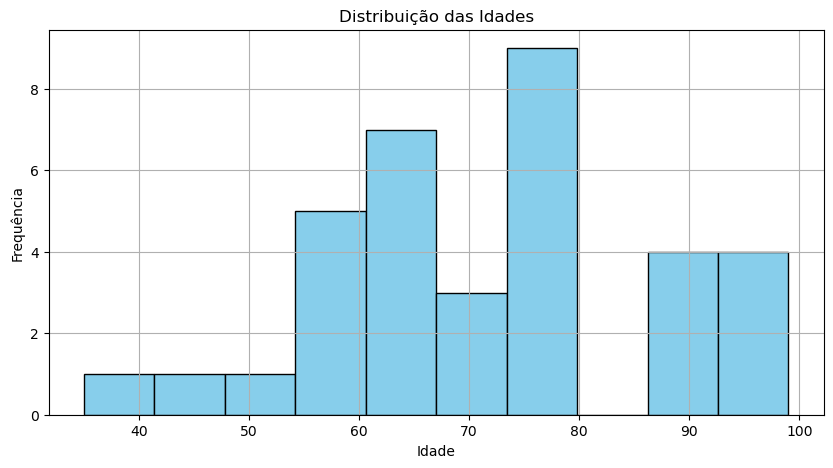

In [84]:
# Gerar gráficos
# 1. Gráfico das idades
plt.figure(figsize=(10,5))
plt.hist(df['Idade'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

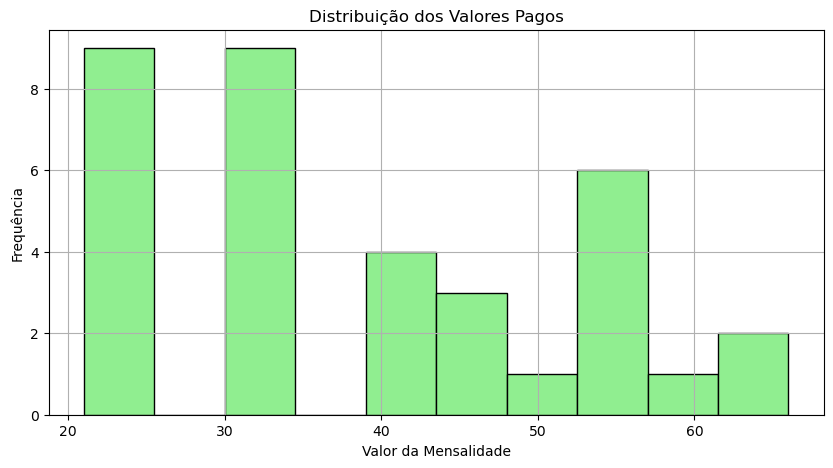

In [86]:
# 2. Gráfico dos valores pagos
plt.figure(figsize=(10,5))
plt.hist(df['Mensalidade'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribuição dos Valores Pagos')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

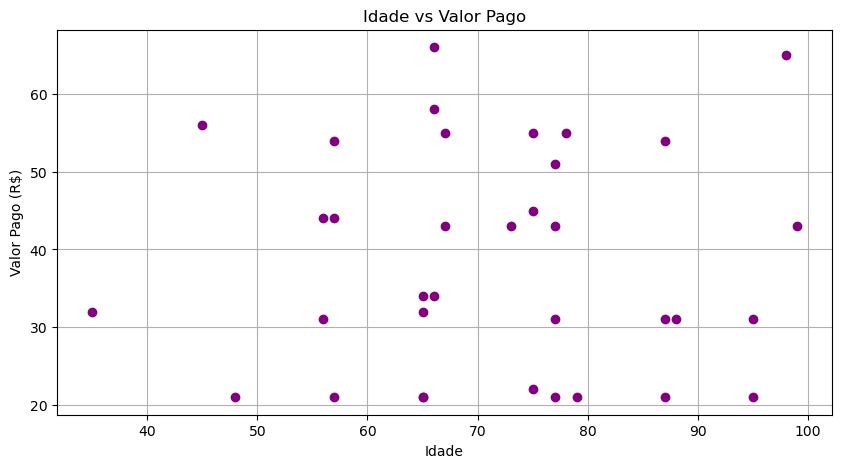

In [88]:
# 3. Gráfico Idade vs Valores Pagos (associados)
plt.figure(figsize=(10,5))
plt.scatter(df['Idade'], df['Mensalidade'], color='purple')
plt.title('Idade vs Valor Pago')
plt.xlabel('Idade')
plt.ylabel('Valor Pago (R$)')
plt.grid(True)
plt.show()

In [114]:
pip install dash pandas plotly

In [116]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

In [118]:
# 1. Carregar dados
df = pd.read_excel(r'C:\Users\Atapel\Contacts\Desktop\UniCesumarfev2022\DSAPythonCurso\Arq01\DSACienDados4\ArqTest\ListAssocATAPELa.xlsx')

In [120]:
# 2. Preparar os cálculos necessários
# Calcular a média de idade
media_idade = df['Idade'].mean()

In [122]:
# Calcular o valor médio das mensalidades
media_mensalidade = df['Mensalidade'].mean()

In [124]:
# Nome da pessoa que pagou o maior valor e o valor pago
maior_valor_pago = df['Mensalidade'].max()
pessoa_maior_pagamento = df.loc[df['Mensalidade'] == maior_valor_pago, 'Nome'].values[0]

In [126]:
# 3. Preparar os gráficos
fig_idades = px.histogram(df, x='Idade', title='Distribuição das Idades')
fig_valores = px.histogram(df, x='Mensalidade', title='Distribuição dos Valores Pagos')
fig_scatter = px.scatter(df, x='Idade', y='Mensalidade', title='Idade vs Valores Pagos')



In [128]:
# 4. Criar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Dashboard de Associados'),
    
    # Média de idade
    html.Div(f"Média de idade: {media_idade:.2f} anos"),
    
    # Média de valores pagos
    html.Div(f"Valor médio das mensalidades: R${media_mensalidade:.2f}"),
    
    # Pessoa com maior valor pago
    html.Div(f"Pessoa que pagou o maior valor: {pessoa_maior_pagamento}, com valor de R${maior_valor_pago:.2f}"),
    
    # Gráficos
    dcc.Graph(
        id='grafico-Idades',
        figure=fig_idades
    ),
    
    dcc.Graph(
        id='grafico-Valores',
        figure=fig_valores
    ),
    
    dcc.Graph(
        id='grafico-scatter',
        figure=fig_scatter
    )
])

# 5. Rodar o servidor
if __name__ == '__main__':
    app.run_server(debug=True)